In [121]:
#if u haven't install the google-play scrapper library u can install it by this code:
!pip install google-play-scraper

In [122]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np

In [123]:
result = reviews_all(
    'com.playstore.android',
    sleep_milliseconds=0, # defaults to 0
    lang='id',            # defaults to 'en'
    country='id',         # defaults to 'us'
    sort=Sort.NEWEST,     # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

In [124]:
result, continuation_token = reviews(
    'org.detikcom.rss',
    lang='id',                # defaults to 'en'
    country='id',             # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=500,               # defaults to 100
    filter_score_with=None    # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

### Dataset diambil dari tahun Oktober 2018 - November 2022 

In [125]:
scrapeddata = pd.DataFrame(np.array(result),columns=['review'])

scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))

scrapeddata

reviewId              userName  \
0    34e57a80-f92e-4180-a63e-c770e789b3b7      Efril Firmansyah   
1    38e5ce9c-5345-4a42-b861-d4fc75ebafdb        Budi Indriawan   
2    dbc3cefb-9b12-4346-bcd7-abc1c71c1271             Mey Arman   
3    f5e17573-444e-4d3f-b34d-61f6a005a095        Muhamad Jasril   
4    c29d3675-b5ce-40cd-9abd-39c6c869d04d       Moch Isako Yuda   
..                                    ...                   ...   
495  c38f18eb-bb77-4704-a4c1-acddc77a4f25   ARSIL OEMAR CHANNEL   
496  060abb6a-1aba-4ad3-ba0e-de358f16f8a5            ayah valen   
497  0ea1451b-1690-4531-8ccd-e55fd8689337          Iwan Permana   
498  a91dc23d-5652-4184-af79-6e77c66f3677       Pengguna Google   
499  2227c1ba-a7c9-478e-833e-0af8315b8b2d  Supriono “Rio” Arema   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a-/ACNPE...   
1    https://play-lh.googleusercontent.com/a-/ACNPE...   
2    https://play-lh.googleusercontent.com/a/ALm5wu...   
3    https://play-lh.googleusercontent.com/a-/ACNPE...   
4    https://play-lh.googleusercontent.com/a-/ACNPE...   
..                                                 ...   
495  https://play-lh.googleusercontent.com/a-/ACNPE...   
496  https://play-lh.googleusercontent.com/a/ALm5wu...   
497  https://play-lh.googleusercontent.com/a/ALm5wu...   
498  https://play-lh.googleusercontent.com/EGemoI2N...   
499  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                               content  score  thumbsUpCount  \
0    1 berita jadi 5 judul yang sedikit berbeda,tap...      2             16   
1    Deh cape Sering gonta ganti Applikasi baca ber...      5             55   
2    Terkadang judul yang 1 dan yg lain dlm berita ...      4            123   
3    Uninstall yang lama dulu setelah itu install u...      5              0   
4    Detikcom yg keluaran 2015 dgn 2020-2022 beda b...      1            192   
..                                                 ...    ...            ...   
495  Maaf ya detik, skrg aku uninstall ya, krn apa2...      1             14   
496  setelah instal detik v6.1.10 hasilnya bagus......      4              0   
497  Toling diperbaiki. Sudah lama pakai detikcom. ...      3             20   
498  Saya sangat kecewa aplikasi ini, lagi enak ena...      1              0   
499  Menyesatkan, itu kata pertama yg terpikirkan o...      1             23   

    reviewCreatedVersion                  at  \
0                  6.2.8 2022-10-11 21:38:19   
1                  6.2.8 2022-09-27 05:30:44   
2                  6.2.7 2022-08-30 13:53:56   
3                  6.2.9 2022-10-17 16:33:53   
4                  6.2.6 2022-07-14 00:25:57   
..                   ...                 ...   
495                6.1.6 2020-10-07 13:52:05   
496               6.1.10 2021-01-26 12:02:18   
497               6.1.13 2021-05-27 15:40:09   
498                 None 2019-03-11 17:57:00   
499                6.0.5 2020-05-27 14:17:00   

                                          replyContent           repliedAt  
0                                                 None                 NaT  
1                                                 None                 NaT  
2                                                 None                 NaT  
3    Halo Muhamad,\n\nTerima kasih atas feedbacknya... 2022-10-17 16:17:16  
4                                                 None                 NaT  
..                                                 ...                 ...  
495                                               None                 NaT  
496                                               None                 NaT  
497                                               None                 NaT  
498                                               None                 NaT  
499                                               None                 NaT  

[500 rows x 10 columns]

In [126]:
len(scrapeddata.index)

500

In [127]:
scrapeddata[['content','score','at']].head() 

content  score  \
0  1 berita jadi 5 judul yang sedikit berbeda,tap...      2   
1  Deh cape Sering gonta ganti Applikasi baca ber...      5   
2  Terkadang judul yang 1 dan yg lain dlm berita ...      4   
3  Uninstall yang lama dulu setelah itu install u...      5   
4  Detikcom yg keluaran 2015 dgn 2020-2022 beda b...      1   

                   at  
0 2022-10-11 21:38:19  
1 2022-09-27 05:30:44  
2 2022-08-30 13:53:56  
3 2022-10-17 16:33:53  
4 2022-07-14 00:25:57

In [128]:
scrapeddata[['score','at']] 

score                  at
0        2 2022-10-11 21:38:19
1        5 2022-09-27 05:30:44
2        4 2022-08-30 13:53:56
3        5 2022-10-17 16:33:53
4        1 2022-07-14 00:25:57
..     ...                 ...
495      1 2020-10-07 13:52:05
496      4 2021-01-26 12:02:18
497      3 2021-05-27 15:40:09
498      1 2019-03-11 17:57:00
499      1 2020-05-27 14:17:00

[500 rows x 2 columns]

In [129]:
scrapeddata.to_csv("playstorescrapping.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

In [130]:
scrappeddata1 = scrapeddata[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=False) #Sort by Newest, change to True if you want to sort by Oldest.
sorteddata.head()

content  score  \
72                                Terlalu banyak iklan      4   
234  Gw uninstal ..... sory ... anda tidak netral b...      1   
6    Banyak sekali kesalahan penulisan, sehingga me...      3   
3    Uninstall yang lama dulu setelah itu install u...      5   
233            Enak buat bacaan utk tambah pengetahuan      5   

                     at  
72  2022-10-18 21:22:26  
234 2022-10-18 09:52:56  
6   2022-10-18 05:57:34  
3   2022-10-17 16:33:53  
233 2022-10-17 16:07:12

### Labelling data with TextBlob

In [131]:
!pip install textblob
from textblob import TextBlob

In [132]:
sample_reviews = sorteddata[['score','at','content']].sample(500)
def detect_polarity(content):
    return TextBlob(content).sentiment.polarity
sample_reviews['polarity'] = sample_reviews.content.apply(detect_polarity)
sample_reviews

score                  at  \
466      1 2020-10-12 02:42:51   
279      1 2020-06-07 16:51:14   
498      1 2019-03-11 17:57:00   
496      4 2021-01-26 12:02:18   
479      1 2019-12-16 19:16:14   
..     ...                 ...   
112      5 2022-05-25 05:22:12   
134      5 2022-05-07 16:46:49   
23       3 2022-06-14 18:50:38   
432      5 2018-09-26 19:15:43   
51       1 2020-09-03 16:03:17   

                                               content  polarity  
466  webnya sinting iklanya, gak ada orang larang i...       0.0  
279  Saya hampir 8 tahun menjadi pembaca setia deti...       0.0  
498  Saya sangat kecewa aplikasi ini, lagi enak ena...       0.0  
496  setelah instal detik v6.1.10 hasilnya bagus......       0.0  
479  Jangan banyakan iklan saya buka lain yang nong...       0.0  
..                                                 ...       ...  
112  detikcom memberikan berita yg terbaru lengkap ...       0.0  
134  Seneng baca berita nya, awalnya updated, akhir...       0.0  
23   Aplikasi berita yg menurut saya paling baik, b...       0.0  
432  Sekedar masukan, setelah di update, aplikasi s...       0.0  
51   Asli ngeselin. Iklan sih boleh aja, nggak masa...       0.0  

[500 rows x 4 columns]

In [133]:
sample_reviews["polarity"].value_counts()

 0.000000    431
 0.200000     12
 0.350000      8
 0.700000      7
 0.150000      4
 0.500000      4
 0.625000      2
 0.136364      2
 0.333333      2
 1.000000      2
-0.100000      2
 0.100000      2
-0.400000      2
 0.100000      1
-0.156250      1
 0.275000      1
 0.033333      1
 0.750000      1
-0.155556      1
 0.166667      1
 0.050000      1
 0.488281      1
-0.700000      1
-0.166667      1
 0.045455      1
-0.381470      1
 0.250000      1
-0.800000      1
-0.500000      1
 0.130000      1
-0.125000      1
 0.400000      1
-0.050000      1
Name: polarity, dtype: int64

# Hasil Polarity textblob 
- positive = 56
- negative = 13
- neutral  = 431

In [134]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
!pip install plotly
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

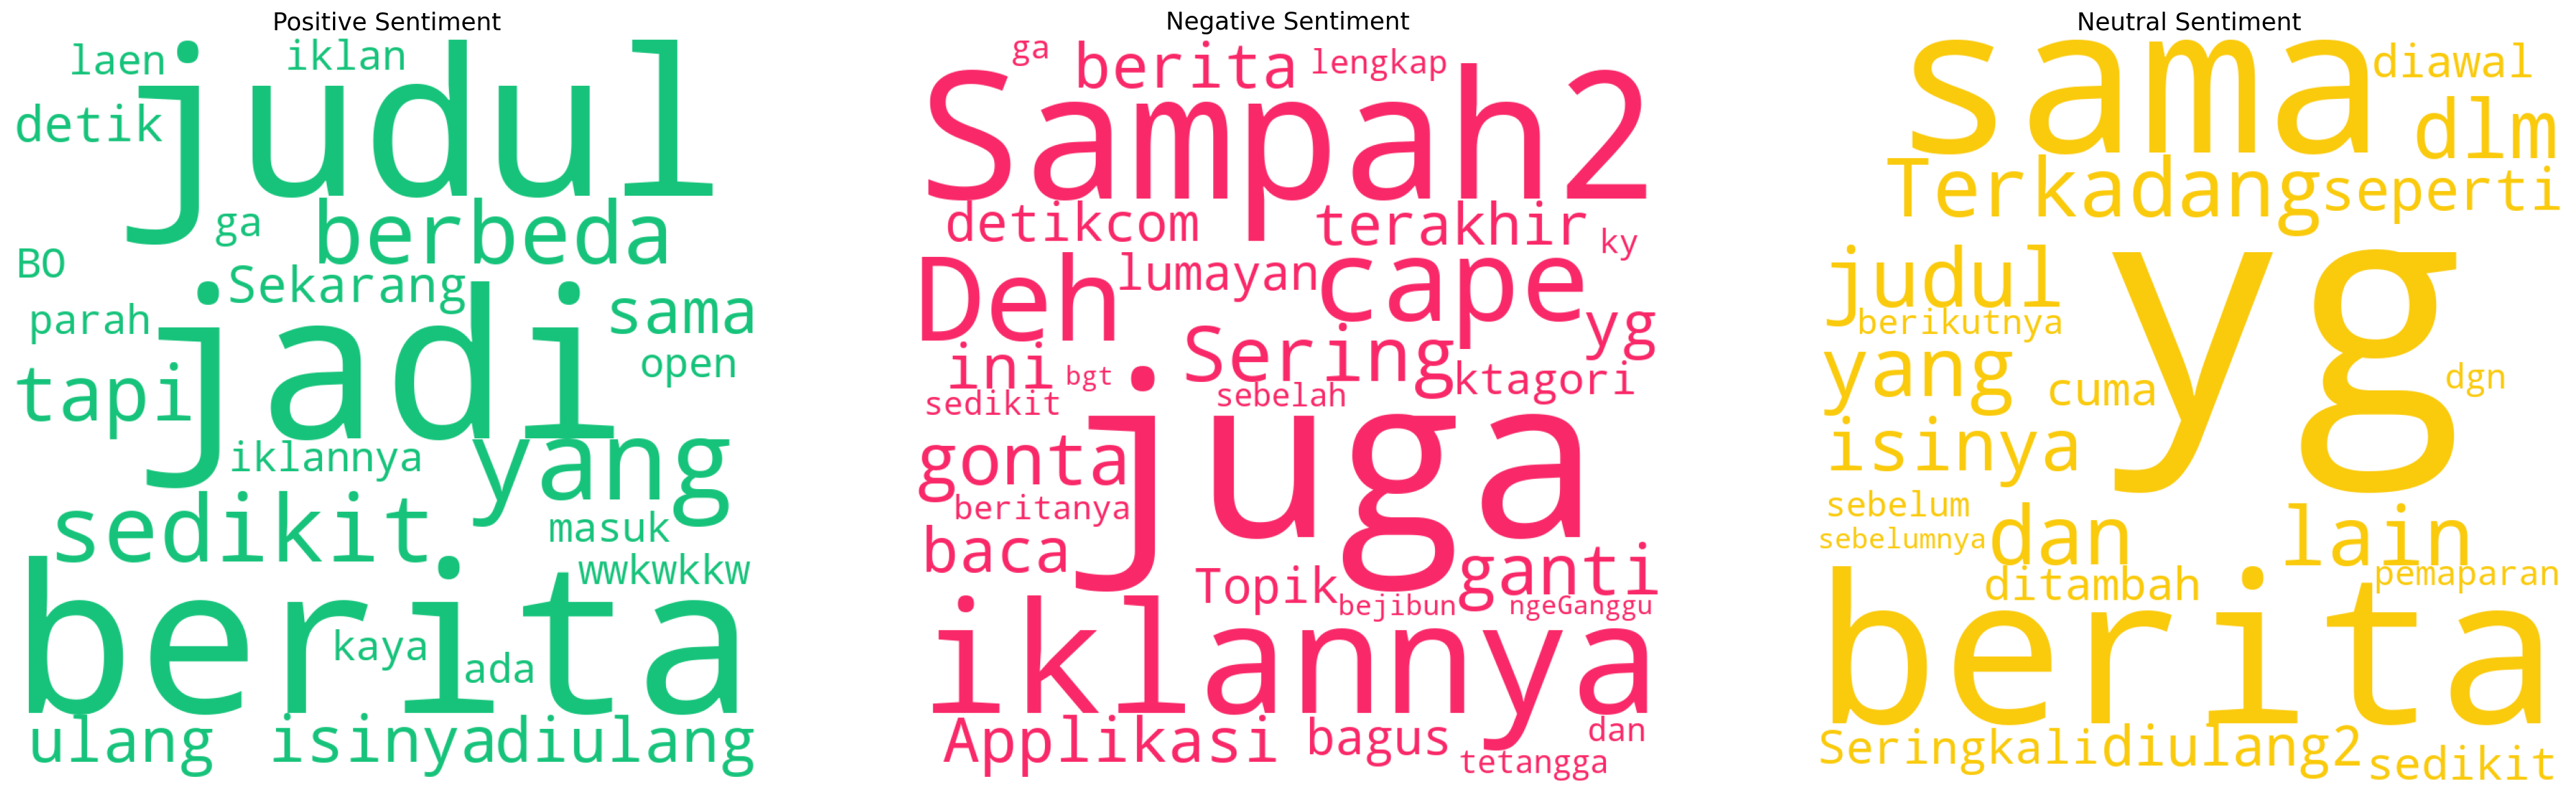

In [135]:
list_colors = ["#17C37B", "#F92969", "#FACA0C"]
list_titles = ["Positive Sentiment", "Negative Sentiment", "Neutral Sentiment"]

fig, axes = plt.subplots(1, 3, figsize=(30, 20), sharey=True, dpi=160)

for i, ax in enumerate (axes.flatten()):
    wc = WordCloud(
        width=800,
        height=800,
        max_words=50,
        min_font_size=10,
        background_color="white",
        colormap="tab10",
        color_func=lambda *args, **kwargs: list_colors[i],
        stopwords=None,
        prefer_horizontal=1.0
    )
    fig.add_subplot(ax)
    wc.generate(sorteddata["content"][i])
    plt.gca().imshow(wc)
    plt.gca().set_title(list_titles[i], fontdict=dict(size=16))
    plt.gca().axis("off")
    
plt.axis("off")
plt.subplots_adjust(hspace=0.6)
plt.show()

## Membuat labelling secara manual berdasarkan score 
- A score of three is neutral and low scores is less than 3 and high score is higher than 3
- The majority of users do not download an app with an average star-rating of less than three

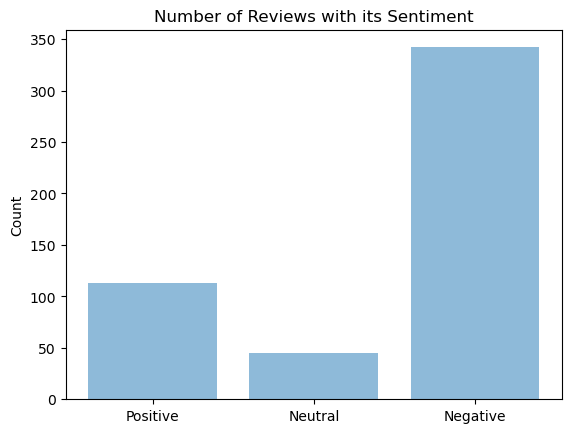

In [136]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
positive = sorteddata[sorteddata['score'] > 3]
neutral = sorteddata[sorteddata['score'] == 3]
negative = sorteddata[sorteddata['score'] < 3]
scores = ('Positive','Neutral', 'Negative')
y_pos = np.arange(len(scores))
numscores = [len(positive), len(neutral),len(negative)]
 
plt.bar(scores, numscores, align='center', alpha=0.5)
plt.xticks(y_pos, scores)
plt.ylabel('Count')
plt.title('Number of Reviews with its Sentiment')
plt.show()

In [137]:
import re
import string as str

### Case Folding

In [138]:
# preprocessing (remove punctuation)
sorteddata['text_punch'] = sorteddata['content'].str.replace(r'[^\w\s]+', '')
# preprocessing (lower)
sorteddata['text_lower'] = sorteddata['text_punch'].str.lower()
# preprocessing (remove whitespace)
sorteddata['text_strip'] = sorteddata['text_lower'].str.strip()
# preprocessing (tokenizing)
sorteddata['text_token'] = sorteddata['text_strip'].str.split()

In [139]:
sorteddata

content  score  \
72                                Terlalu banyak iklan      4   
234  Gw uninstal ..... sory ... anda tidak netral b...      1   
6    Banyak sekali kesalahan penulisan, sehingga me...      3   
3    Uninstall yang lama dulu setelah itu install u...      5   
233            Enak buat bacaan utk tambah pengetahuan      5   
..                                                 ...    ...   
403  Coba dong detik perbarui aplikasinya masa kalo...      2   
167  Semakin lama makin banyak iklan yg mengganggu....      2   
58   Kalau seumpama mode bacanya ada lebih dari mod...      5   
432  Sekedar masukan, setelah di update, aplikasi s...      5   
361  Versi 5.3.0 tolong diperbaiki. Setiap buka art...      1   

                     at                                         text_punch  \
72  2022-10-18 21:22:26                               Terlalu banyak iklan   
234 2022-10-18 09:52:56  Gw uninstal  sory  anda tidak netral brooo ber...   
6   2022-10-18 05:57:34  Banyak sekali kesalahan penulisan sehingga mem...   
3   2022-10-17 16:33:53  Uninstall yang lama dulu setelah itu install u...   
233 2022-10-17 16:07:12            Enak buat bacaan utk tambah pengetahuan   
..                  ...                                                ...   
403 2018-10-16 10:37:30  Coba dong detik perbarui aplikasinya masa kalo...   
167 2018-10-13 10:28:30  Semakin lama makin banyak iklan yg mengganggu ...   
58  2018-10-03 06:55:54  Kalau seumpama mode bacanya ada lebih dari mod...   
432 2018-09-26 19:15:43  Sekedar masukan setelah di update aplikasi sem...   
361 2018-09-25 05:43:04  Versi 530 tolong diperbaiki Setiap buka artike...   

                                            text_lower  \
72                                terlalu banyak iklan   
234  gw uninstal  sory  anda tidak netral brooo ber...   
6    banyak sekali kesalahan penulisan sehingga mem...   
3    uninstall yang lama dulu setelah itu install u...   
233            enak buat bacaan utk tambah pengetahuan   
..                                                 ...   
403  coba dong detik perbarui aplikasinya masa kalo...   
167  semakin lama makin banyak iklan yg mengganggu ...   
58   kalau seumpama mode bacanya ada lebih dari mod...   
432  sekedar masukan setelah di update aplikasi sem...   
361  versi 530 tolong diperbaiki setiap buka artike...   

                                            text_strip  \
72                                terlalu banyak iklan   
234  gw uninstal  sory  anda tidak netral brooo ber...   
6    banyak sekali kesalahan penulisan sehingga mem...   
3    uninstall yang lama dulu setelah itu install u...   
233            enak buat bacaan utk tambah pengetahuan   
..                                                 ...   
403  coba dong detik perbarui aplikasinya masa kalo...   
167  semakin lama makin banyak iklan yg mengganggu ...   
58   kalau seumpama mode bacanya ada lebih dari mod...   
432  sekedar masukan setelah di update aplikasi sem...   
361  versi 530 tolong diperbaiki setiap buka artike...   

                                            text_token  
72                            [terlalu, banyak, iklan]  
234  [gw, uninstal, sory, anda, tidak, netral, broo...  
6    [banyak, sekali, kesalahan, penulisan, sehingg...  
3    [uninstall, yang, lama, dulu, setelah, itu, in...  
233     [enak, buat, bacaan, utk, tambah, pengetahuan]  
..                                                 ...  
403  [coba, dong, detik, perbarui, aplikasinya, mas...  
167  [semakin, lama, makin, banyak, iklan, yg, meng...  
58   [kalau, seumpama, mode, bacanya, ada, lebih, d...  
432  [sekedar, masukan, setelah, di, update, aplika...  
361  [versi, 530, tolong, diperbaiki, setiap, buka,...  

[500 rows x 7 columns]

### Sastrawi Stemming

In [140]:
!pip install Sastrawi

In [141]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [142]:
#create steammer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [143]:
##PorterStemmer
!pip install nltk
import nltk 
ps = nltk.PorterStemmer()

In [144]:
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text
 #Buat kolom tambahan untuk data description yang telah dilemmatization   
sorteddata['text_stem'] = sorteddata['text_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [145]:
#setelah dilakukan stemmer
sorteddata

content  score  \
72                                Terlalu banyak iklan      4   
234  Gw uninstal ..... sory ... anda tidak netral b...      1   
6    Banyak sekali kesalahan penulisan, sehingga me...      3   
3    Uninstall yang lama dulu setelah itu install u...      5   
233            Enak buat bacaan utk tambah pengetahuan      5   
..                                                 ...    ...   
403  Coba dong detik perbarui aplikasinya masa kalo...      2   
167  Semakin lama makin banyak iklan yg mengganggu....      2   
58   Kalau seumpama mode bacanya ada lebih dari mod...      5   
432  Sekedar masukan, setelah di update, aplikasi s...      5   
361  Versi 5.3.0 tolong diperbaiki. Setiap buka art...      1   

                     at                                         text_punch  \
72  2022-10-18 21:22:26                               Terlalu banyak iklan   
234 2022-10-18 09:52:56  Gw uninstal  sory  anda tidak netral brooo ber...   
6   2022-10-18 05:57:34  Banyak sekali kesalahan penulisan sehingga mem...   
3   2022-10-17 16:33:53  Uninstall yang lama dulu setelah itu install u...   
233 2022-10-17 16:07:12            Enak buat bacaan utk tambah pengetahuan   
..                  ...                                                ...   
403 2018-10-16 10:37:30  Coba dong detik perbarui aplikasinya masa kalo...   
167 2018-10-13 10:28:30  Semakin lama makin banyak iklan yg mengganggu ...   
58  2018-10-03 06:55:54  Kalau seumpama mode bacanya ada lebih dari mod...   
432 2018-09-26 19:15:43  Sekedar masukan setelah di update aplikasi sem...   
361 2018-09-25 05:43:04  Versi 530 tolong diperbaiki Setiap buka artike...   

                                            text_lower  \
72                                terlalu banyak iklan   
234  gw uninstal  sory  anda tidak netral brooo ber...   
6    banyak sekali kesalahan penulisan sehingga mem...   
3    uninstall yang lama dulu setelah itu install u...   
233            enak buat bacaan utk tambah pengetahuan   
..                                                 ...   
403  coba dong detik perbarui aplikasinya masa kalo...   
167  semakin lama makin banyak iklan yg mengganggu ...   
58   kalau seumpama mode bacanya ada lebih dari mod...   
432  sekedar masukan setelah di update aplikasi sem...   
361  versi 530 tolong diperbaiki setiap buka artike...   

                                            text_strip  \
72                                terlalu banyak iklan   
234  gw uninstal  sory  anda tidak netral brooo ber...   
6    banyak sekali kesalahan penulisan sehingga mem...   
3    uninstall yang lama dulu setelah itu install u...   
233            enak buat bacaan utk tambah pengetahuan   
..                                                 ...   
403  coba dong detik perbarui aplikasinya masa kalo...   
167  semakin lama makin banyak iklan yg mengganggu ...   
58   kalau seumpama mode bacanya ada lebih dari mod...   
432  sekedar masukan setelah di update aplikasi sem...   
361  versi 530 tolong diperbaiki setiap buka artike...   

                                            text_token  \
72                            [terlalu, banyak, iklan]   
234  [gw, uninstal, sory, anda, tidak, netral, broo...   
6    [banyak, sekali, kesalahan, penulisan, sehingg...   
3    [uninstall, yang, lama, dulu, setelah, itu, in...   
233     [enak, buat, bacaan, utk, tambah, pengetahuan]   
..                                                 ...   
403  [coba, dong, detik, perbarui, aplikasinya, mas...   
167  [semakin, lama, makin, banyak, iklan, yg, meng...   
58   [kalau, seumpama, mode, bacanya, ada, lebih, d...   
432  [sekedar, masukan, setelah, di, update, aplika...   
361  [versi, 530, tolong, diperbaiki, setiap, buka,...   

                                             text_stem  
72                            [terlalu, banyak, iklan]  
234  [gw, uninstal, sory, anda, tidak, netral, broo...  
6    [banyak, sekali, salah, tulis, sehingga, buat,...  
3    [unin

In [151]:
sorteddata[['content','text_stem']].head(5) 

content  \
72                                Terlalu banyak iklan   
234  Gw uninstal ..... sory ... anda tidak netral b...   
6    Banyak sekali kesalahan penulisan, sehingga me...   
3    Uninstall yang lama dulu setelah itu install u...   
233            Enak buat bacaan utk tambah pengetahuan   

                                             text_stem  
72                            [terlalu, banyak, iklan]  
234  [gw, uninstal, sory, anda, tidak, netral, broo...  
6    [banyak, sekali, salah, tulis, sehingga, buat,...  
3    [uninstall, yang, lama, dulu, telah, itu, inst...  
233              [enak, buat, baca, utk, tambah, tahu]

## Pembobotan TF-IDF

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
#Perhitungan TF
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

sorteddata["TF_dict"] = sorteddata['text_stem'].apply(calc_TF)

sorteddata["TF_dict"].head()

72     {'terlalu': 0.3333333333333333, 'banyak': 0.33...
234    {'gw': 0.0625, 'uninstal': 0.0625, 'sory': 0.0...
6      {'banyak': 0.08333333333333333, 'sekali': 0.08...
3      {'uninstall': 0.07142857142857142, 'yang': 0.0...
233    {'enak': 0.16666666666666666, 'buat': 0.166666...
Name: TF_dict, dtype: object

In [156]:
# Check TF result (Hasil perhitungan TF)
index = 1

print('%20s' % "term", "\t", "TF\n")
for key in sorteddata["TF_dict"][index]:
    print('%20s' % key, "\t", sorteddata["TF_dict"][index][key])

                term 	 TF

                 deh 	 0.03225806451612903
                cape 	 0.03225806451612903
              sering 	 0.03225806451612903
               gonta 	 0.03225806451612903
               ganti 	 0.03225806451612903
           applikasi 	 0.03225806451612903
                baca 	 0.03225806451612903
           beritaini 	 0.03225806451612903
                  yg 	 0.03225806451612903
               akhir 	 0.03225806451612903
            detikcom 	 0.03225806451612903
             lumayan 	 0.03225806451612903
               bagus 	 0.03225806451612903
               topik 	 0.03225806451612903
             ktagori 	 0.03225806451612903
              berita 	 0.03225806451612903
                juga 	 0.06451612903225806
             lengkap 	 0.03225806451612903
                 dan 	 0.03225806451612903
             sampah2 	 0.06451612903225806
               iklan 	 0.06451612903225806
           sedikitga 	 0.03225806451612903
                  ky 	 0.03

In [157]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(sorteddata["TF_dict"])
DF

{'terlalu': 47,
 'banyak': 111,
 'iklan': 186,
 'gw': 5,
 'uninstal': 23,
 'sory': 1,
 'anda': 11,
 'tidak': 139,
 'netral': 36,
 'brooo': 1,
 'berita': 300,
 'sungguh': 3,
 'aneh': 13,
 'pantes': 1,
 'dagh': 1,
 'bnyak': 4,
 'yg': 172,
 'bilang': 4,
 'sekali': 36,
 'salah': 32,
 'tulis': 30,
 'sehingga': 14,
 'buat': 63,
 'baca': 147,
 'kurang': 33,
 'erti': 5,
 'isi': 49,
 'dari': 66,
 'uninstall': 40,
 'yang': 119,
 'lama': 56,
 'dulu': 68,
 'telah': 48,
 'itu': 57,
 'install': 9,
 'ulang': 19,
 'kembali': 27,
 'baru': 54,
 'bisa': 117,
 'sudah': 79,
 'ok': 5,
 'terimakasih': 17,
 'enak': 10,
 'utk': 12,
 'tambah': 23,
 'tahu': 9,
 'maaf': 15,
 'lazadanya': 1,
 'kecewa': 23,
 'sentuh': 2,
 'langsung': 31,
 'keluar': 28,
 'amplikasinya': 1,
 'nya': 78,
 'aktual': 8,
 'ngga': 3,
 'kaya': 16,
 'media': 49,
 'belah': 11,
 'jelas': 19,
 'judul': 53,
 'sangat': 90,
 'n': 7,
 'terkinimantap': 1,
 'di': 167,
 'bacanyacuma': 1,
 'tolong': 39,
 'sesuai': 23,
 'fakta': 6,
 'lapang': 1,
 'dan':

In [158]:
import numpy as np
n_document = len(sorteddata)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)
IDF

{'terlalu': 2.3434070875143007,
 'banyak': 1.4961092271270973,
 'iklan': 0.9834994815676051,
 'gw': 4.422848629194137,
 'uninstal': 3.036554268074246,
 'sory': 5.521460917862246,
 'anda': 3.7297014486341915,
 'tidak': 1.2729656758128876,
 'netral': 2.6036901857779675,
 'brooo': 5.521460917862246,
 'berita': 0.507497833673316,
 'sungguh': 4.8283137373023015,
 'aneh': 3.575550768806933,
 'pantes': 5.521460917862246,
 'dagh': 5.521460917862246,
 'bnyak': 4.605170185988092,
 'yg': 1.0613165039244128,
 'bilang': 4.605170185988092,
 'sekali': 2.6036901857779675,
 'salah': 2.7181005369557116,
 'tulis': 2.7806208939370456,
 'sehingga': 3.506557897319982,
 'buat': 2.05572501506252,
 'baca': 1.2173958246580767,
 'kurang': 2.6882475738060303,
 'erti': 4.422848629194137,
 'isi': 2.302585092994046,
 'dari': 2.0099154790312257,
 'uninstall': 2.501036031717884,
 'yang': 1.4271163556401458,
 'lama': 2.1715568305876416,
 'dulu': 1.9805015938249324,
 'telah': 2.322787800311565,
 'itu': 2.154165087875772

In [159]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
sorteddata["TF-IDF_dict"] = sorteddata["TF_dict"].apply(calc_TF_IDF)

In [160]:
# Check TF-IDF result
index = 1

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in sorteddata["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", sorteddata["TF_dict"][index][key] ,"\t" , sorteddata["TF-IDF_dict"][index][key])


                term 	         TF 	              TF-IDF

                 deh 	 0.03225806451612903 	 0.12959301680922491
                cape 	 0.03225806451612903 	 0.15575205604200973
              sering 	 0.03225806451612903 	 0.0643580772014866
               gonta 	 0.03225806451612903 	 0.16503212289529298
               ganti 	 0.03225806451612903 	 0.10907725014083793
           applikasi 	 0.03225806451612903 	 0.17811164251168535
                baca 	 0.03225806451612903 	 0.039270833053486345
           beritaini 	 0.03225806451612903 	 0.17811164251168535
                  yg 	 0.03225806451612903 	 0.034236016255626216
               akhir 	 0.03225806451612903 	 0.09415391072315686
            detikcom 	 0.03225806451612903 	 0.06733786172184195
             lumayan 	 0.03225806451612903 	 0.15575205604200973
               bagus 	 0.03225806451612903 	 0.0706211744415175
               topik 	 0.03225806451612903 	 0.1426725364256173
             ktagori 	 0.032258064

In [162]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

sorteddata["TF_IDF_Vec"] = sorteddata["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(sorteddata["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(sorteddata["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.023068083348787093, 0.0, 0.0894090437788732, 0.0, 0.04877020645088781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06449170694661138, 0.06486892525637027, 0.0, 0.0, 0.0, 0.07548778212825687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09488516878986819, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10116472962990533, 0.10466295877245664]

matrix size :  50


In [163]:
# Convert Series to List
TF_IDF_Vec_List = np.array(sorteddata["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

term       rank
2      iklan  12.027706
0     berita   8.981873
1        dan   8.425505
4      detik   8.418869
3         yg   8.404733
14    banyak   8.200403
8   aplikasi   7.942115
12      yang   7.886812
5         di   7.666467
7       saya   7.597591
9      tidak   7.334111
11       ada   7.201999
17    sangat   7.108691
6       baca   7.099597
43     makin   6.863626
22       nya   6.582700
35    update   6.341878
13      bisa   6.335292
23      buka   6.140358
38    selalu   5.977364
15      lagi   5.964396
36  detikcom   5.879713
16      jadi   5.852434
30    muncul   5.500628
34        ga   5.450966
18      baik   5.440786
10       ini   5.423744
26    sering   5.280789
25  sekarang   5.273653
41       gak   5.198446
45     bagus   5.145723
21     sudah   5.137989
32     lebih   5.115438
20        ke   4.994994
31     harus   4.972119
28    ganggu   4.953474
19      tapi   4.945318
48     judul   4.780658
42       aja   4.742614
46      baru   4.735093
29     untuk   4.720021
44      lama   4.714799
24      dulu   4.634953
47       mau   4.552202
40      tiap   4.503492
27      dari   4.482979
49       isi   4.334493
33      buat   4.291795
37    dengan   4.220992
39       itu   3.929386

## Pembagian Training Test data

In [164]:
X = sorteddata.iloc[:,0:36]
y = sorteddata['text_stem']

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [167]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 375
Banyak data x_test  : 125
Banyak data y_train : 375
Banyak data y_test  : 125


## Analysis and Visualization
1. k - Nearest Neighbor (k-NN)
2. Naïve Bayes
3. Logistic Regression
4. Support Vector Machines (SVMs)
5. Decision Trees
6. Random Forests
7. Neural Networks
8. Deep Neural Networks


In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error